## 强化学习过程中的一些代码

### Temporal-Difference Learning

时间差分(TD)学习，用于在不知道环境的响应的情况下，即无法知道转移概率$P(s'|s, a)$，
对于给定的策略$\pi(s)$，在策略迭代中，如果获取该策略对应的值函数$V^{\pi}(s)$.

蒙特卡洛方法是，一开始将$V^{\pi}$初始化为0，从t时刻状态$s_t$开始，
将整个过程按照策略$\pi(s)$走完，得到总的回报$R_t$，然后按照下式更新值函数

$$
V^{\pi}(s_t) \leftarrow V^{\pi}(s_t)+ \alpha\left[R_t - V^{\pi}(s_t)\right]
$$


这种方法需要将整个流程走完，效率比较低，TDL的方法是只迭代一步

$$
V^{\pi}(s_t) \leftarrow V^{\pi}(s_t)+ \alpha\left[r_{t+1} + \gamma V^{\pi}(s_{t+1}) - V^{\pi}(s_t)\right]
$$

In [1]:
import numpy as np

nS = 10
actual_reward = np.zeros(nS)
actual_reward[nS-1] = 100

In [2]:
import random
def random_policy(s):
    if s==0 or (s < nS-1 and random.random()<0.5):
        return s+1
    else:
        return s-1 

In [40]:
V = np.zeros(nS)
alpha = 0.9
gamma = 0.9
for i in range(10000):
    if (i+1) % 10 == 0:
        alpha = 0.9/np.sqrt(i/10.0)
    s = np.random.randint(0, nS)
    while s != nS-1 and s != 0:
        ss = random_policy(s)
        r = actual_reward[ss]
        V[s] += alpha * (r + gamma*V[ss] - V[s])
        s = ss

In [41]:
print alpha

0.0284619220732


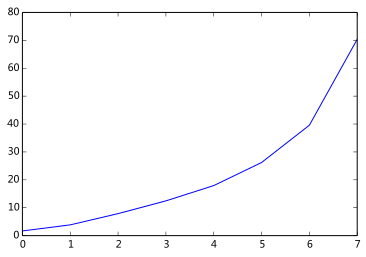

In [42]:
import matplotlib.pyplot as plt
plt.plot(V[1:-1])